In [1]:
# Covid-vaccine uptake/ Vaccine hesitancy data
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
# load data set
data= pd.read_excel("Covid Vaccine.xls")
data.head()

record_id redcap_survey_identifier    consent_timestamp       date consent  \
0          1                           2021-10-29 10:20:08 2021-10-29     Yes   
1          3                           2021-10-29 10:38:08 2021-10-29     Yes   
2          4                           2021-10-29 10:46:12 2021-10-29     Yes   
3          5                           2021-10-29 12:30:18 2021-10-29     Yes   
4          6                           2021-10-29 20:04:37 2021-10-29     Yes   

  consent_complete     survey_timestamp        studysite  gender   age  ...  \
0         Complete  2021-10-29 10:33:33  Avenue Hospital  Female  27.0  ...   
1         Complete  2021-10-29 10:44:21  Avenue Hospital  Female  27.0  ...   
2         Complete  2021-10-29 10:50:45  Avenue Hospital  Female  32.0  ...   
3         Complete  2021-10-29 12:36:17  Avenue Hospital  Female  29.0  ...   
4         Complete  2021-10-29 20:08:15  Avenue Hospital    Male  29.0  ...   

  social_media        hcp family_members government pharmaceutical  \
0    Unchecked    Checked      Unchecked  Unchecked      Unchecked   
1    Unchecked    Checked      Unchecked  Unchecked      Unchecked   
2    Unchecked    Checked      Unchecked  Unchecked      Unchecked   
3    Unchecked  Unchecked      Unchecked  Unchecked      Unchecked   
4    Unchecked    Checked      Unchecked    Checked      Unchecked   

  scientific articles don't_trust survey_complete siteFinal VaccineStatus  
0           Unchecked   Unchecked        Complete         1             1  
1           Unchecked   Unchecked        Complete         1             1  
2           Unchecked   Unchecked        Complete         1             1  
3           Unchecked   Unchecked        Complete         1             1  
4           Unchecked   Unchecked        Complete         1             1  

[5 rows x 79 columns]

# Exploratory Data Analysis

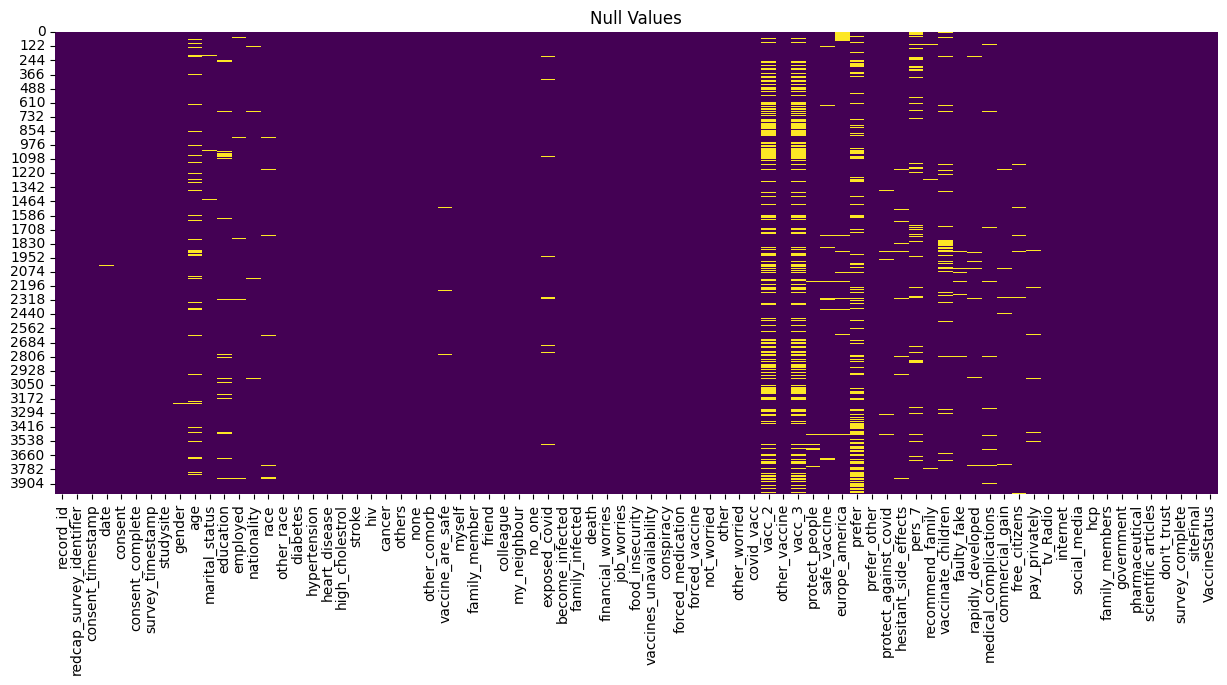

In [3]:
# Visualize null values
plt.figure(figsize=(15, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

plt.title('Null Values')
plt.show()

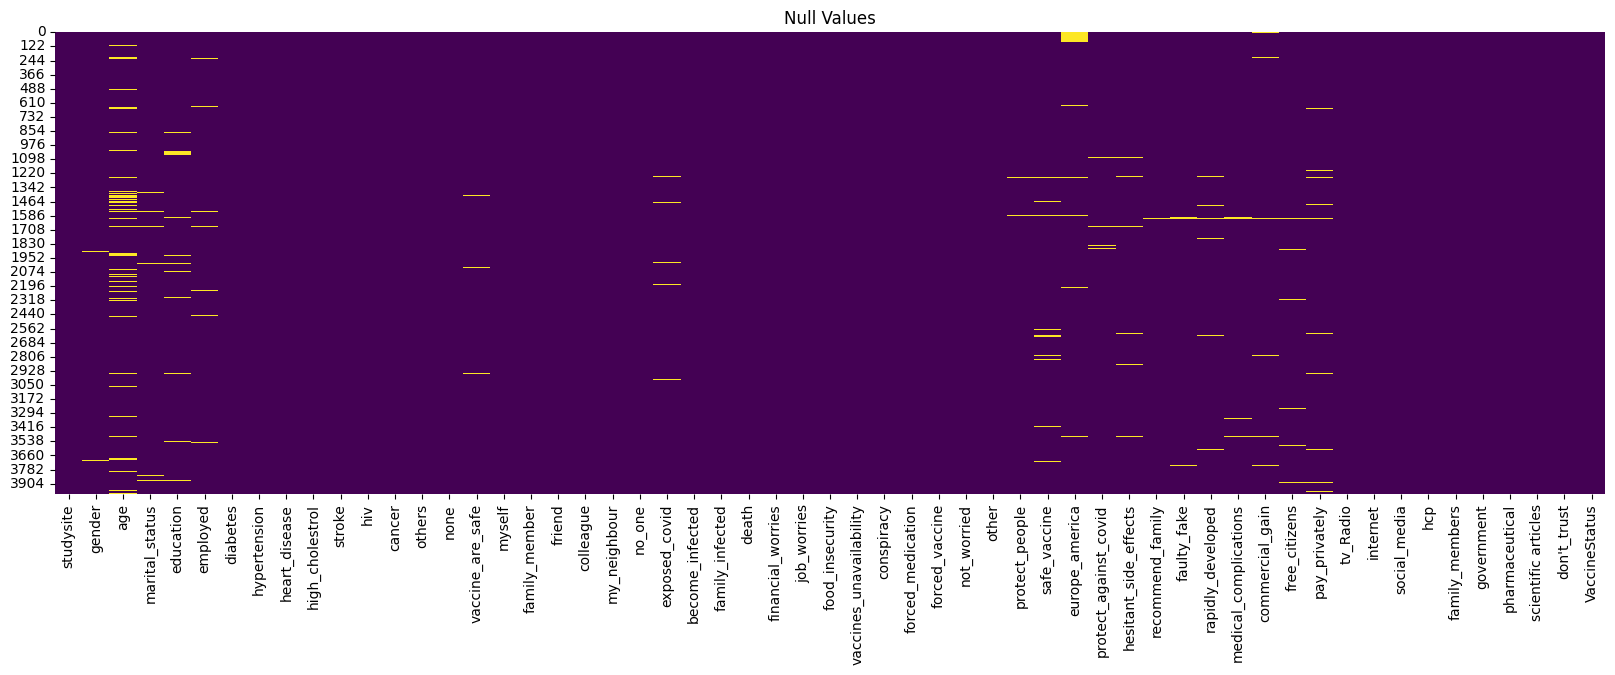

In [4]:
# drop columns centred around uptake of the vaccine
data_2 = data.drop(columns=['covid_vacc','other_vaccine','vacc_2','vacc_3','prefer','pers_7'])

# droppping more columns, for feature selection/engineering
data_3 = data_2.drop(columns=['record_id','redcap_survey_identifier','consent_timestamp','date','consent','consent_complete','survey_timestamp',
                              'nationality','race','other_race','other_comorb','other_worried','prefer_other','vaccinate_children','survey_complete','siteFinal'])


plt.figure(figsize=(20, 6))
sns.heatmap(data_3.isnull(), cbar=False, cmap='viridis')

plt.title('Null Values')
plt.show()

In [5]:
# group hospital names/ study site into Public, Private, Faith Based
hospital_mapping = {
    'Aga Khan University, Nairobi':'private', 
    'Avenue Hospital':'private',
    'Mediheal Hospital':'private',
    'Penda Health':'private',
    'PCEA Hospital': 'faith',
    'Coast General Hospital': 'public'
}
data_3['studysite'] = data_3['studysite'].replace(hospital_mapping)
data_3.head(5)

studysite  gender   age marital_status      education  \
0   private  Female  27.0         Single  Undergraduate   
1   private  Female  27.0        Married        Diploma   
2   private  Female  32.0        Married        Diploma   
3   private  Female  29.0         Single        Diploma   
4   private    Male  29.0         Single  Undergraduate   

                   employed   diabetes hypertension heart_disease  \
0  Employed / Self Employed  Unchecked    Unchecked     Unchecked   
1  Employed / Self Employed  Unchecked    Unchecked     Unchecked   
2  Employed / Self Employed    Checked    Unchecked     Unchecked   
3  Employed / Self Employed  Unchecked    Unchecked     Unchecked   
4  Employed / Self Employed  Unchecked    Unchecked     Unchecked   

  high_cholestrol  ...   tv_Radio   internet social_media        hcp  \
0       Unchecked  ...  Unchecked  Unchecked    Unchecked    Checked   
1       Unchecked  ...  Unchecked  Unchecked    Unchecked    Checked   
2       Unchecked  ...  Unchecked  Unchecked    Unchecked    Checked   
3       Unchecked  ...    Checked  Unchecked    Unchecked  Unchecked   
4       Unchecked  ...  Unchecked  Unchecked    Unchecked    Checked   

  family_members government pharmaceutical scientific articles don't_trust  \
0      Unchecked  Unchecked      Unchecked           Unchecked   Unchecked   
1      Unchecked  Unchecked      Unchecked           Unchecked   Unchecked   
2      Unchecked  Unchecked      Unchecked           Unchecked   Unchecked   
3      Unchecked  Unchecked      Unchecked           Unchecked   Unchecked   
4      Unchecked    Checked      Unchecked           Unchecked   Unchecked   

  VaccineStatus  
0             1  
1             1  
2             1  
3             1  
4             1  

[5 rows x 57 columns]

In [6]:
# Change age variable from continuos to categorical variable
# Define bins and labels starting from 18-29 

bins = [18, 25, 35, 55]  
labels = [1, 2, 3]  


data_3['age_code'] = pd.cut(data_3['age'], bins=bins, labels=labels, right=False)

data_3 = data_3.drop(columns=['age'])

data_3.head(5)

studysite  gender marital_status      education                  employed  \
0   private  Female         Single  Undergraduate  Employed / Self Employed   
1   private  Female        Married        Diploma  Employed / Self Employed   
2   private  Female        Married        Diploma  Employed / Self Employed   
3   private  Female         Single        Diploma  Employed / Self Employed   
4   private    Male         Single  Undergraduate  Employed / Self Employed   

    diabetes hypertension heart_disease high_cholestrol     stroke  ...  \
0  Unchecked    Unchecked     Unchecked       Unchecked  Unchecked  ...   
1  Unchecked    Unchecked     Unchecked       Unchecked  Unchecked  ...   
2    Checked    Unchecked     Unchecked       Unchecked  Unchecked  ...   
3  Unchecked    Unchecked     Unchecked       Unchecked  Unchecked  ...   
4  Unchecked    Unchecked     Unchecked       Unchecked  Unchecked  ...   

    internet social_media        hcp family_members government pharmaceutical  \
0  Unchecked    Unchecked    Checked      Unchecked  Unchecked      Unchecked   
1  Unchecked    Unchecked    Checked      Unchecked  Unchecked      Unchecked   
2  Unchecked    Unchecked    Checked      Unchecked  Unchecked      Unchecked   
3  Unchecked    Unchecked  Unchecked      Unchecked  Unchecked      Unchecked   
4  Unchecked    Unchecked    Checked      Unchecked    Checked      Unchecked   

  scientific articles don't_trust VaccineStatus age_code  
0           Unchecked   Unchecked             1        2  
1           Unchecked   Unchecked             1        2  
2           Unchecked   Unchecked             1        2  
3           Unchecked   Unchecked             1        2  
4           Unchecked   Unchecked             1        2  

[5 rows x 57 columns]

In [7]:
# change all columns to category data type
for column in data_3:
    data_3[column]=data_3[column].astype('category')


data_3.dtypes

studysite                  category
gender                     category
marital_status             category
education                  category
employed                   category
diabetes                   category
hypertension               category
heart_disease              category
high_cholestrol            category
stroke                     category
hiv                        category
cancer                     category
others                     category
none                       category
vaccine_are_safe           category
myself                     category
family_member              category
friend                     category
colleague                  category
my_neighbour               category
no_one                     category
exposed_covid              category
become_infected            category
family_infected            category
death                      category
financial_worries          category
job_worries                category
food_insecurity            c

In [8]:
# fill columns with null values with mode value for every column
for column in data_3:
    mode = data_3[column].mode()[0]
    data_3[column].fillna(mode, inplace=True)

data_3.isnull().sum()

C:\Users\Hp\AppData\Local\Temp\ipykernel_10372\934498436.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_3[column].fillna(mode, inplace=True)


studysite                  0
gender                     0
marital_status             0
education                  0
employed                   0
diabetes                   0
hypertension               0
heart_disease              0
high_cholestrol            0
stroke                     0
hiv                        0
cancer                     0
others                     0
none                       0
vaccine_are_safe           0
myself                     0
family_member              0
friend                     0
colleague                  0
my_neighbour               0
no_one                     0
exposed_covid              0
become_infected            0
family_infected            0
death                      0
financial_worries          0
job_worries                0
food_insecurity            0
vaccines_unavailability    0
conspiracy                 0
forced_medication          0
forced_vaccine             0
not_worried                0
other                      0
protect_people

In [9]:
# create another dataframe, copy
data_4 = data_3
# data_4.to_csv('vaccine_cleaned',encoding='utf-8', index=False)

In [32]:
# import sys
# column_names = data_3.columns.tolist()
# with open("columns.txt", 'w') as f:
#     sys.stdout = f
#     print(column_names)
#     sys.stdout = sys.__stdout__

In [10]:
# set features to encode, set vaccine status column as target
data_4_features = data_4.drop(['VaccineStatus'], axis=1)

# outcome
data_4_outcome = data_4[['VaccineStatus']]


In [11]:
# for encoding purposes
# data_4_features['studysite'].head(10)

In [12]:
### Ordinal encoding 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in data_4_features.columns:
    data_4_features[col] = le.fit_transform(data_4_features[col])

data_4_features.head(5)

studysite  gender  marital_status  education  employed  diabetes  \
0          1       0               2          3         0         1   
1          1       0               0          0         0         1   
2          1       0               0          0         0         0   
3          1       0               2          0         0         1   
4          1       1               2          3         0         1   

   hypertension  heart_disease  high_cholestrol  stroke  ...  tv_Radio  \
0             1              1                1       1  ...         1   
1             1              1                1       1  ...         1   
2             1              1                1       1  ...         1   
3             1              1                1       1  ...         0   
4             1              1                1       1  ...         1   

   internet  social_media  hcp  family_members  government  pharmaceutical  \
0         1             1    0               1           1               1   
1         1             1    0               1           1               1   
2         1             1    0               1           1               1   
3         1             1    1               1           1               1   
4         1             1    0               1           0               1   

   scientific articles  don't_trust  age_code  
0                    1            1         1  
1                    1            1         1  
2                    1            1         1  
3                    1            1         1  
4                    1            1         1  

[5 rows x 56 columns]

In [13]:
# for encoding purposes
# data_4_features['studysite'].head(10)

In [14]:
data_5 = pd.concat([data_4_features,data_4_outcome.reset_index(drop=True)], axis=1)

data_5['VaccineStatus'] = data_5['VaccineStatus'].astype('category')
data_5.head()

studysite  gender  marital_status  education  employed  diabetes  \
0          1       0               2          3         0         1   
1          1       0               0          0         0         1   
2          1       0               0          0         0         0   
3          1       0               2          0         0         1   
4          1       1               2          3         0         1   

   hypertension  heart_disease  high_cholestrol  stroke  ...  internet  \
0             1              1                1       1  ...         1   
1             1              1                1       1  ...         1   
2             1              1                1       1  ...         1   
3             1              1                1       1  ...         1   
4             1              1                1       1  ...         1   

   social_media  hcp  family_members  government  pharmaceutical  \
0             1    0               1           1               1   
1             1    0               1           1               1   
2             1    0               1           1               1   
3             1    1               1           1               1   
4             1    0               1           0               1   

   scientific articles  don't_trust  age_code  VaccineStatus  
0                    1            1         1              1  
1                    1            1         1              1  
2                    1            1         1              1  
3                    1            1         1              1  
4                    1            1         1              1  

[5 rows x 57 columns]

In [16]:
# Correlation between variables and Vaccine Status
correlation = data_5.corr()

corr = abs(correlation['VaccineStatus'])

# Select highest correlating values
co_Features = corr[corr>0.1]
co_Features.drop(labels=['VaccineStatus'], inplace=True)
co_Features.sort_values(ascending=False, inplace=True)
co_Features.head(30)

employed                 0.264741
don't_trust              0.218126
hcp                      0.212605
no_one                   0.199848
forced_vaccine           0.195179
family_infected          0.190911
exposed_covid            0.174687
become_infected          0.167110
free_citizens            0.165972
age_code                 0.159814
colleague                0.159621
pay_privately            0.150524
faulty_fake              0.146592
scientific articles      0.121561
protect_against_covid    0.118822
myself                   0.115704
protect_people           0.113201
forced_medication        0.112868
commercial_gain          0.112057
not_worried              0.109891
hesitant_side_effects    0.109527
medical_complications    0.101577
Name: VaccineStatus, dtype: float64

<Axes: >

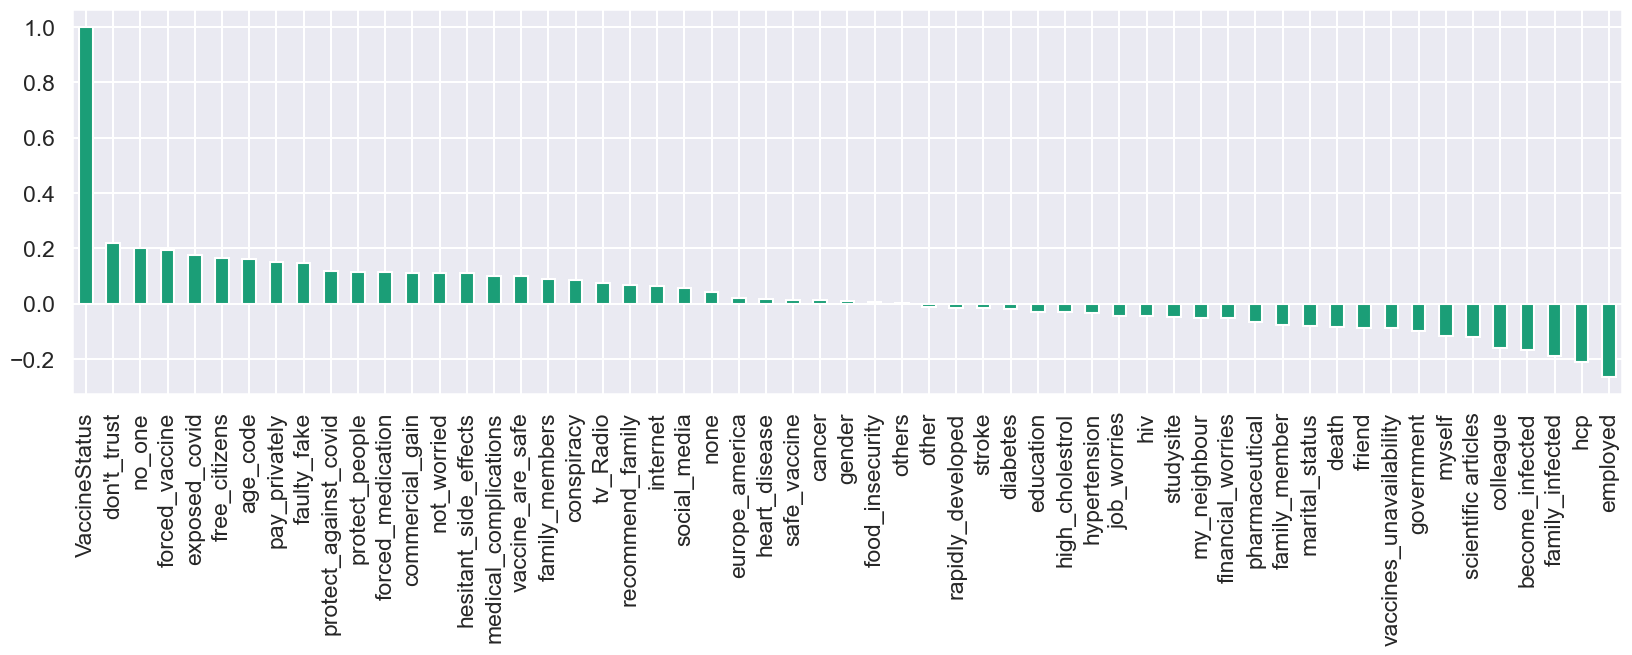

In [17]:
# Create plot
sns.set_theme(style='darkgrid', context='talk', palette='Dark2')
plt.figure(figsize=(20,5))
data_5.corr()['VaccineStatus'].sort_values(ascending = False).plot(kind='bar')
# plt.savefig("Vaccine status correlation plot")

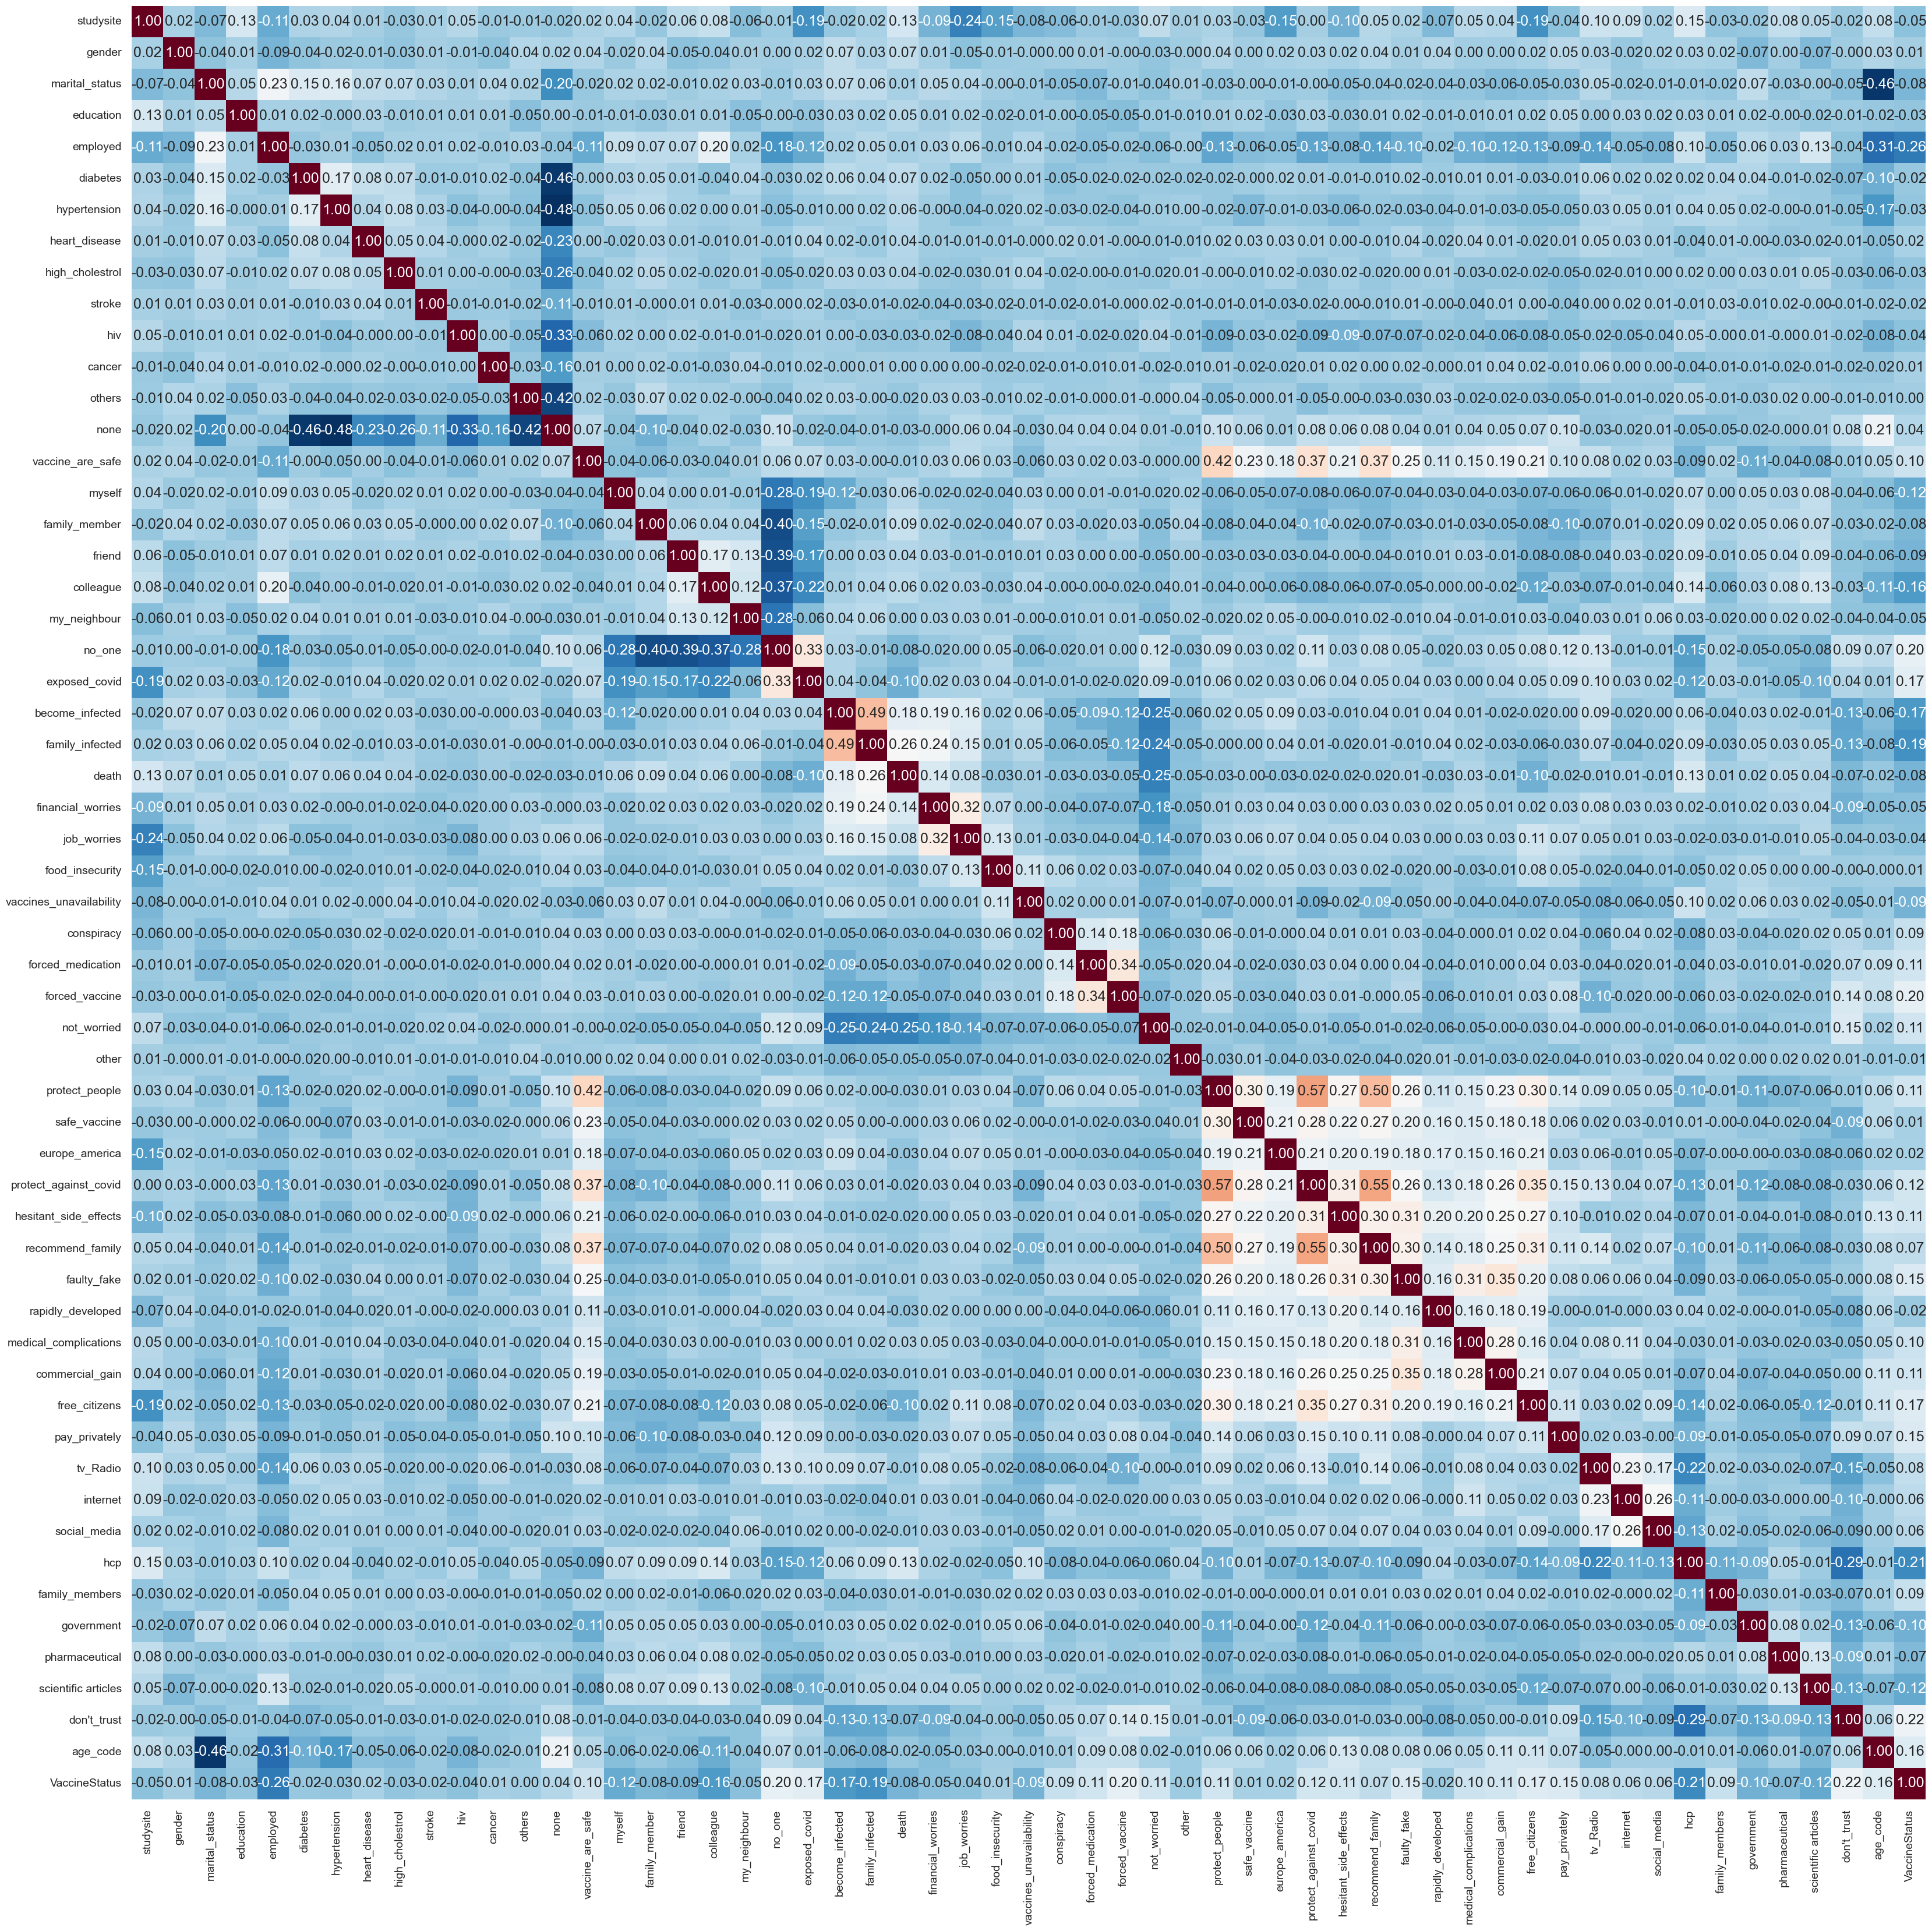

<Figure size 640x480 with 0 Axes>

In [18]:
# correlation plot across all variables
f, ax = plt.subplots(figsize=(40,40))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

sns.heatmap(correlation, mask=np.zeros_like(correlation), cmap="RdBu_r",
            square=True, ax=ax, cbar=False,fmt=".2f", annot=True)

plt.show()
plt.savefig("correlation plot")

# Running Models

In [19]:
# Prepare input/target variables
input = data_5.drop(['VaccineStatus'], axis=1)
target = data_5['VaccineStatus']

from sklearn.model_selection import train_test_split
X = input
y = target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

# DECISION TREE CLASSIFIER

In [20]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

#clf.get_params()

In [21]:
clf.score(X_test, y_test)
# 0.74

0.7422852376980817

# RANDOM FOREST CLASSIFIER

In [22]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(n_estimators=300, random_state=42)

RF_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [23]:
from sklearn.metrics import accuracy_score

n_runs = 500
accuracies = []  # to store accuracy for each run

for run in range(n_runs):
    # Make predictions
    y_pred = RF_clf.predict(X_test)

    # Calculate and store the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    average_accuracy = sum(accuracies) / len(accuracies)
    

print(f"Average Accuracy over {n_runs} runs: {average_accuracy:.2f}")
# 0.82

Average Accuracy over 500 runs: 0.82


# SVM CLASSIFIER

In [24]:
## SVM

# # SVM classifier
from sklearn import svm
from sklearn.calibration import CalibratedClassifierCV

svm_clf = svm.SVC(probability=True)

svm_clf.fit(X_train, y_train)



SVC(probability=True)

In [25]:
n_runs = 500
svm_accuracies = []  # to store accuracy for each run

for run in range(n_runs):
    # Make predictions
    svm_y_pred = svm_clf.predict(X_test)

    # Calculate and store the accuracy
    svm_accuracy = accuracy_score(y_test, svm_y_pred)
    svm_accuracies.append(svm_accuracy)

    svm_average_accuracy = sum(svm_accuracies) / len(svm_accuracies)
    
print(f"Average Accuracy over {n_runs} runs: {svm_average_accuracy:.2f}")


Average Accuracy over 500 runs: 0.79


# XGBOOST CLASSIFIER

In [26]:
# XGBOOST
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [27]:
n_runs = 500
xgb_accuracies = []  # to store accuracy for each run

for run in range(n_runs):
    # Make predictions
    xgb_y_pred = xgb_clf.predict(X_test)

    # Calculate and store the accuracy
    xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
    xgb_accuracies.append(xgb_accuracy)

    xgb_average_accuracy = sum(xgb_accuracies) / len(xgb_accuracies)

print(f"Average Accuracy over {n_runs} runs: {xgb_average_accuracy:.2f}")

Average Accuracy over 500 runs: 0.83


# Model Evaluation
The F1 score is particularly useful when you want to find a balance between precision and recall,as it considers both false positives and false negatives. It's a good metric to use when the class distribution is 
uneven or when you want to avoid overly optimistic or pessimistic evaluations of model performance.

In [28]:
from sklearn.metrics import f1_score
f1_rf = f1_score(y_test, y_pred, average='weighted')
f1_xgb = f1_score(y_test, xgb_y_pred, average='weighted')
f1_svm = f1_score(y_test, svm_y_pred, average='weighted')
print(f"RF F1 score {f1_rf:.2f}")
print(f"XGB F1 score {f1_xgb:.2f}")
print(f"SVM F1 score {f1_svm:.2f}")


RF F1 score 0.82
XGB F1 score 0.82
SVM F1 score 0.77


# Recall score
It measures the ability of the model to correctly identify positive instances out of all actual positive instances.

In [90]:

from sklearn.metrics import recall_score

sensitivity = recall_score(y_test, y_pred)
sensitivity_svm = recall_score(y_test, svm_y_pred)
sensitivity_xgb = recall_score(y_test, xgb_y_pred)

print("RF Sensitivity (Recall):", sensitivity)
print("SVM Sensitivity (Recall):", sensitivity_svm)
print("XGB Sensitivity (Recall):", sensitivity_xgb)

RF Sensitivity (Recall): 0.9123649459783914
SVM Sensitivity (Recall): 0.9195678271308524
XGB Sensitivity (Recall): 0.865546218487395


In [32]:
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are the true and predicted labels
cm = confusion_matrix(y_test, y_pred)
cm

array([[211, 139],
       [ 61, 788]], dtype=int64)

# ROC
Receiver Operating Characteristic  
To understand ROC, we first start with defining sensitivity and specificty.  
- sensitivity: the proportion of people who actually have a target disease that are tested positive  
- specificity: the proportion of people who do not have a target disease that are tested negative. 

The ROC curve is an analytical method, represented as a graph, that is used to evaluate the performance of a binary diagnostic classification method.  
The ROC curve connects the coordinate points using “1 – specificity (false positive rate)” as the x-axis and “sensitivity” as the y-axis for all cut-off values measured from the test results. The stricter the criteria for determining a positive result, the more points on the curve shift downward and to the left. In contrast, if a loose criterion is applied, the point on the curve moves upward and to the right.  

## AUC
Area Under the Curve  
AUC is widely used to measure the accuracy of diagnostic tests. 
The ideal ROC curve thus has an AUC = 1.0. However, when the coordinates of the x-axis (1 – specificity) and the y-axis correspond to 1 : 1 (i.e., true positive rate = false positive rate), a graph is drawn on the 45° diagonal (y = x) of the ROC curve (AUC = 0.5).

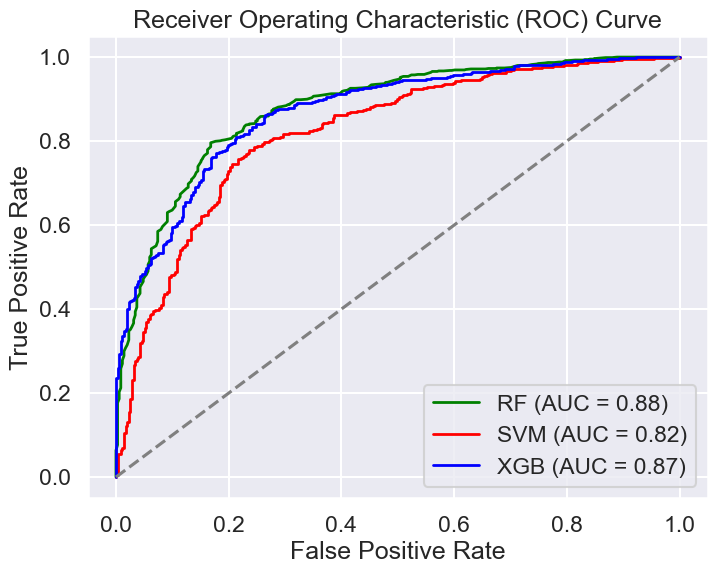

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC & AUC for the 3 models
models = [RF_clf, svm_clf, xgb_clf]
names = ['RF', 'SVM', 'XGB']
colors = ['green', 'red', 'blue']

plt.figure(figsize=(8, 6))


for i, model in enumerate (models):
    
    predicted_probabilities = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    
    fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)

    # Calculate AUC
    auc = roc_auc_score(y_test, predicted_probabilities)
    
    # Plot ROC curve for the current model
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'{names[i]} (AUC = %0.2f)' % auc)

# Plot the random classifier line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Random Forest Feature Importances


 Feature importance plots offer a more comprehensive view by considering both linear and non-linear relationships, as well as interactions between features, in the context of predictive modeling.  
 Correlation plots provide insights into linear relationships between features and the outcome variable.

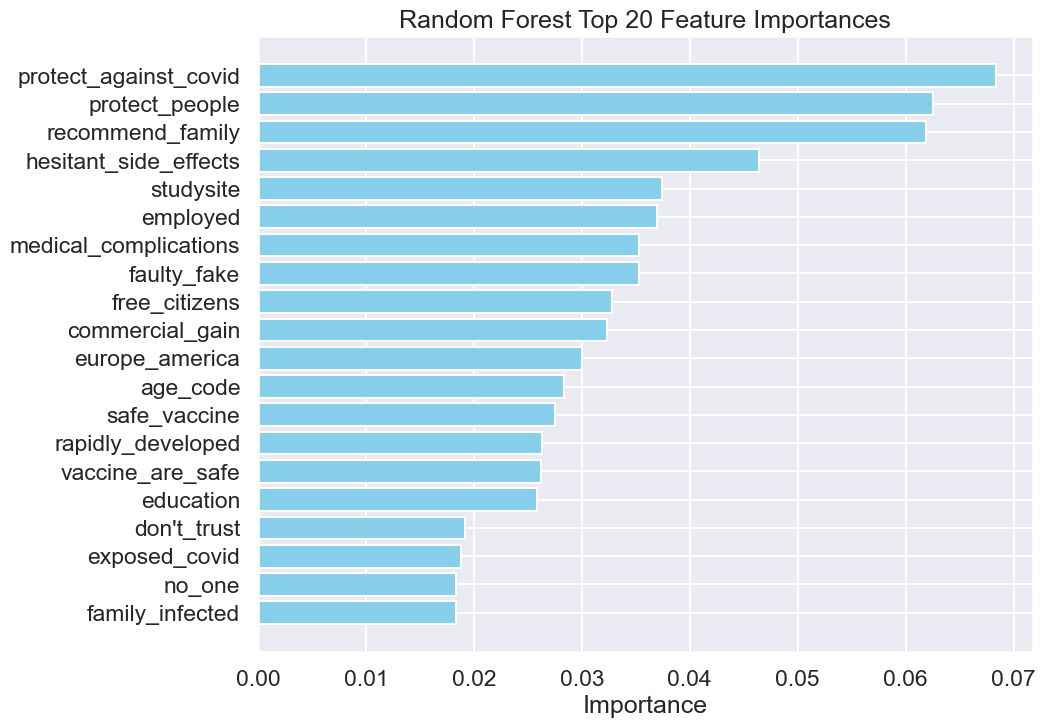

<Figure size 640x480 with 0 Axes>

In [52]:
random_features = X.columns
forest_importance = RF_clf.feature_importances_

# Combine the importances and names into a list of tuples and sort them by importance
random_importance = sorted(zip(forest_importance, random_features), key=lambda x: x[0])

# Select the top 20 features (or all features if there are fewer than 20)
top_20_features = random_importance[-20:]

# Separate the importances and names into two lists
top_20_importances, top_20_names = zip(*top_20_features)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(range(20), top_20_importances, align='center', color='skyblue')
plt.yticks(range(20), top_20_names)
plt.xlabel('Importance')
plt.title('Random Forest Top 20 Feature Importances')
plt.show()
plt.savefig("RF Feature Importance")

The permutation-based feature importance is more agnostic, and it assesses how a feature affects the model’s predictive performance. it involves a randomly shuffling values of a single feature and then measure the reduction in model performance criterion. The greater the reduction is, the more important the feature is.

In [53]:
from sklearn.feature_selection import SelectFromModel

select_features = SelectFromModel(RF_clf)
select_features.get_support()

array([ True, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True])

In [54]:
selected_feat= X_train.columns[(select_features.get_support())]
print(selected_feat)

Index(['studysite', 'education', 'employed', 'vaccine_are_safe', 'no_one',
       'exposed_covid', 'family_infected', 'protect_people', 'safe_vaccine',
       'europe_america', 'protect_against_covid', 'hesitant_side_effects',
       'recommend_family', 'faulty_fake', 'rapidly_developed',
       'medical_complications', 'commercial_gain', 'free_citizens',
       'pay_privately', 'don't_trust', 'age_code'],
      dtype='object')


Categorical data is a tricky area for implementations like sklearn in python. Such data must first be converted into numerical input, and you can do this in two ways:
Given n categorical levels, create a new feature taking values  
0,1,…,n−1
This method has the **disadvantage of enforcing artificial relationships between the levels.**  

Given n categorical levels, create n-1 or n dummy variables, each one being a binary indicator of one of the levels. This eliminates the drawback of imposing relationships between the categorical levels, **but is also dilutes the strength of the feature**. A RF at each split point looks for the most predictive feature, but if you've changed a column into 5 or 10 of them, the power of each new dummy column individually is diminished, so perhaps the original feature never gets to speak.

# Let's look at permutation importance in Random Forest

In [55]:
## Permutation Importance
from sklearn.inspection import permutation_importance

rf_perm_importance = permutation_importance(RF_clf, X_test, y_test, n_repeats=30, n_jobs=-1)

In [56]:
rf_features = X.columns
# Combine the importances and names into a list of tuples and sort them by importance
rf_importance = sorted(zip(rf_perm_importance.importances_mean, rf_features), key=lambda x: x[0])

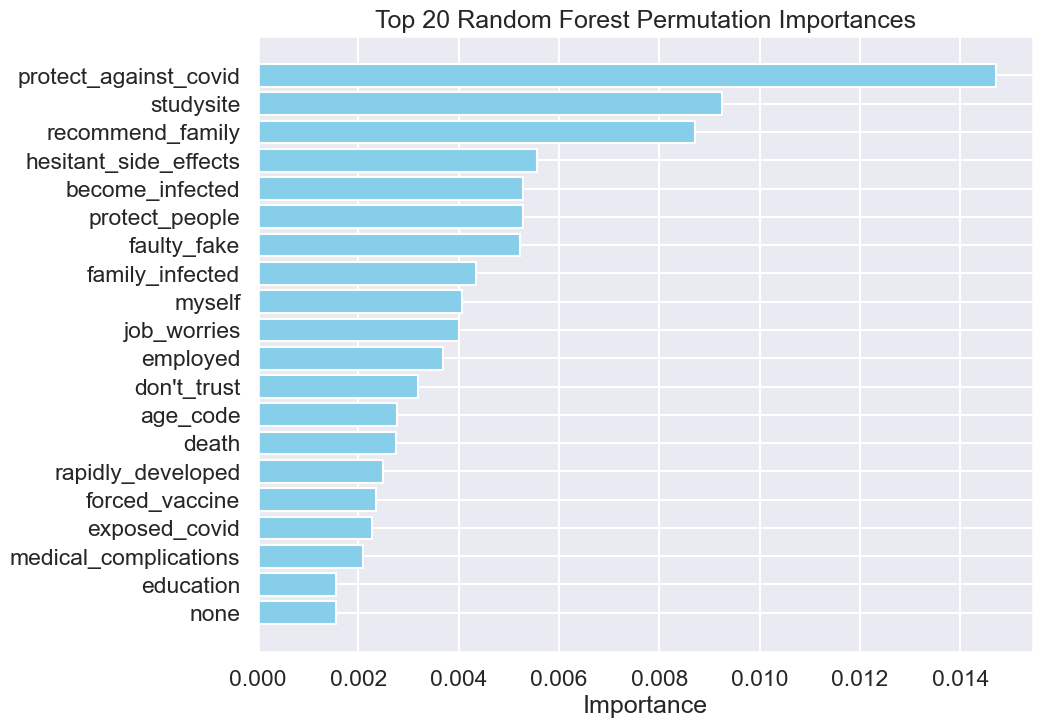

In [57]:
# Select the top 20 features (or all features if there are fewer than 20)
top_20_features = rf_importance[-20:]

# Separate the importances and names into two lists
top_20_importances, top_20_names = zip(*top_20_features)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(range(20), top_20_importances, align='center', color='skyblue')
plt.yticks(range(20), top_20_names)
plt.xlabel('Importance')
plt.title('Top 20 Random Forest Permutation Importances')
plt.show()

# Partial Dependancy Plots  
Useful tool for gaining insights into the relationship between features and predictions. It helps us understand how different values of a particular feature impact model’s predictions.

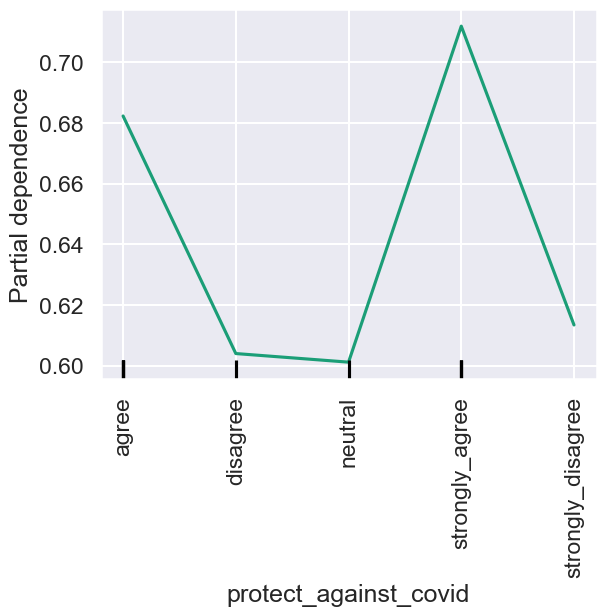

In [58]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay


var = 'protect_against_covid'
labels = ['agree', 'disagree', 'neutral', 'strongly_agree', 'strongly_disagree']

# order s.a, a. n, d, s.d


PartialDependenceDisplay.from_estimator(RF_clf, X_train, [var])
plt.xticks(ticks=[0,1,2,3,4], labels=labels, rotation=90);

Tp better understand PDPs, we take a deep dive and look into Individual Conditional Expectation plots (ICE)
- the next code chunk is on manual approach to plotting PDPs and ICE

In [35]:
values = X_train[var].sort_values().unique()
print(f"Unique values: {values}")

Unique values: [0 1 2 3 4]


In [36]:
individual = np.empty((len(X_train), len(values)))

for i, value in enumerate(values):
    X_copy = X_train.copy()
    X_copy[var] = value
    individual[:, i] = model.predict_proba(X_copy)[:, 1]
individual

array([[0.99607146, 0.98587877, 0.98883188, 0.99839801, 0.98642111],
       [0.99240053, 0.97230238, 0.97245502, 0.98733509, 0.43040276],
       [0.87831932, 0.9206835 , 0.94896227, 0.93183649, 0.91981339],
       ...,
       [0.0591178 , 0.00795196, 0.00953185, 0.08643904, 0.02983589],
       [0.99897218, 0.99104846, 0.99072134, 0.99891841, 0.98921216],
       [0.9834342 , 0.91000056, 0.95552582, 0.99416935, 0.97175342]])

In [37]:
individual.mean(axis=0)

array([0.69833351, 0.58761425, 0.60098557, 0.73220957, 0.61607006])

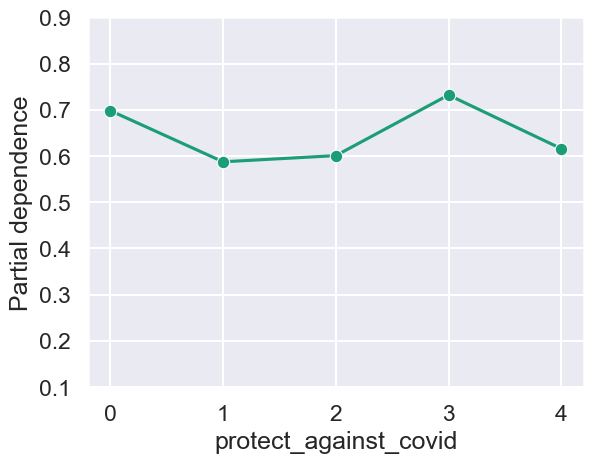

In [38]:
# Plotting PDPs from raw values
sns.lineplot(x=values, y=individual.mean(axis=0), style=0, markers=True, legend=False)
plt.ylim(0.1,0.9)
plt.ylabel("Partial dependence")
plt.xlabel(var);

In [59]:
raw_values = partial_dependence(RF_clf, X_train, var, kind='both')
raw_values

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


{'grid_values': [array([0, 1, 2, 3, 4])],
 'values': [array([0, 1, 2, 3, 4])],
 'average': array([[0.68232749, 0.60400548, 0.60116792, 0.71194613, 0.61343344]]),
 'individual': array([[[0.91333333, 0.87333333, 0.86333333, 0.94333333, 0.84      ],
         [0.89      , 0.84333333, 0.86      , 0.98      , 0.81      ],
         [0.84333333, 0.69      , 0.68      , 0.7       , 0.7       ],
         ...,
         [0.19666667, 0.22      , 0.24666667, 0.44666667, 0.34666667],
         [0.98333333, 0.9       , 0.87333333, 0.95666667, 0.82      ],
         [0.85333333, 0.85333333, 0.88      , 0.88666667, 0.75666667]]])}

In [40]:
print(np.array_equal(raw_values['individual'][0], individual))
print(np.isclose(raw_values['average'][0], 
                 np.mean(individual, axis=0)))

True
[ True  True  True  True  True]


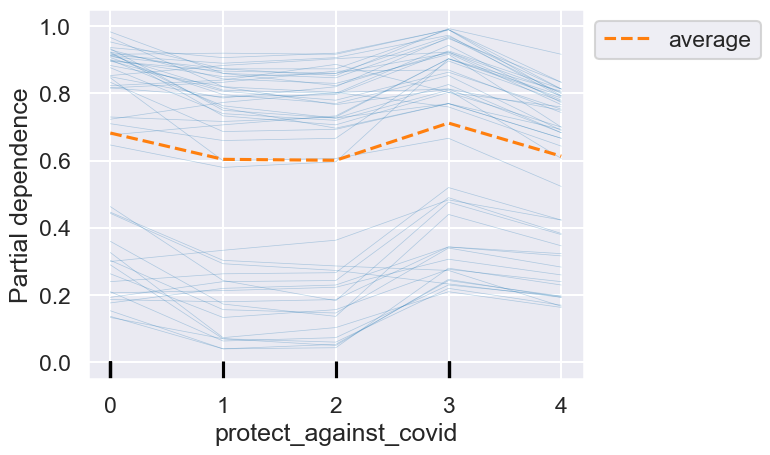

In [60]:
n = 50
PartialDependenceDisplay.from_estimator(RF_clf, X_train, ['protect_against_covid'], kind="both", n_jobs=3, subsample=n)
plt.legend(bbox_to_anchor=(1,1));

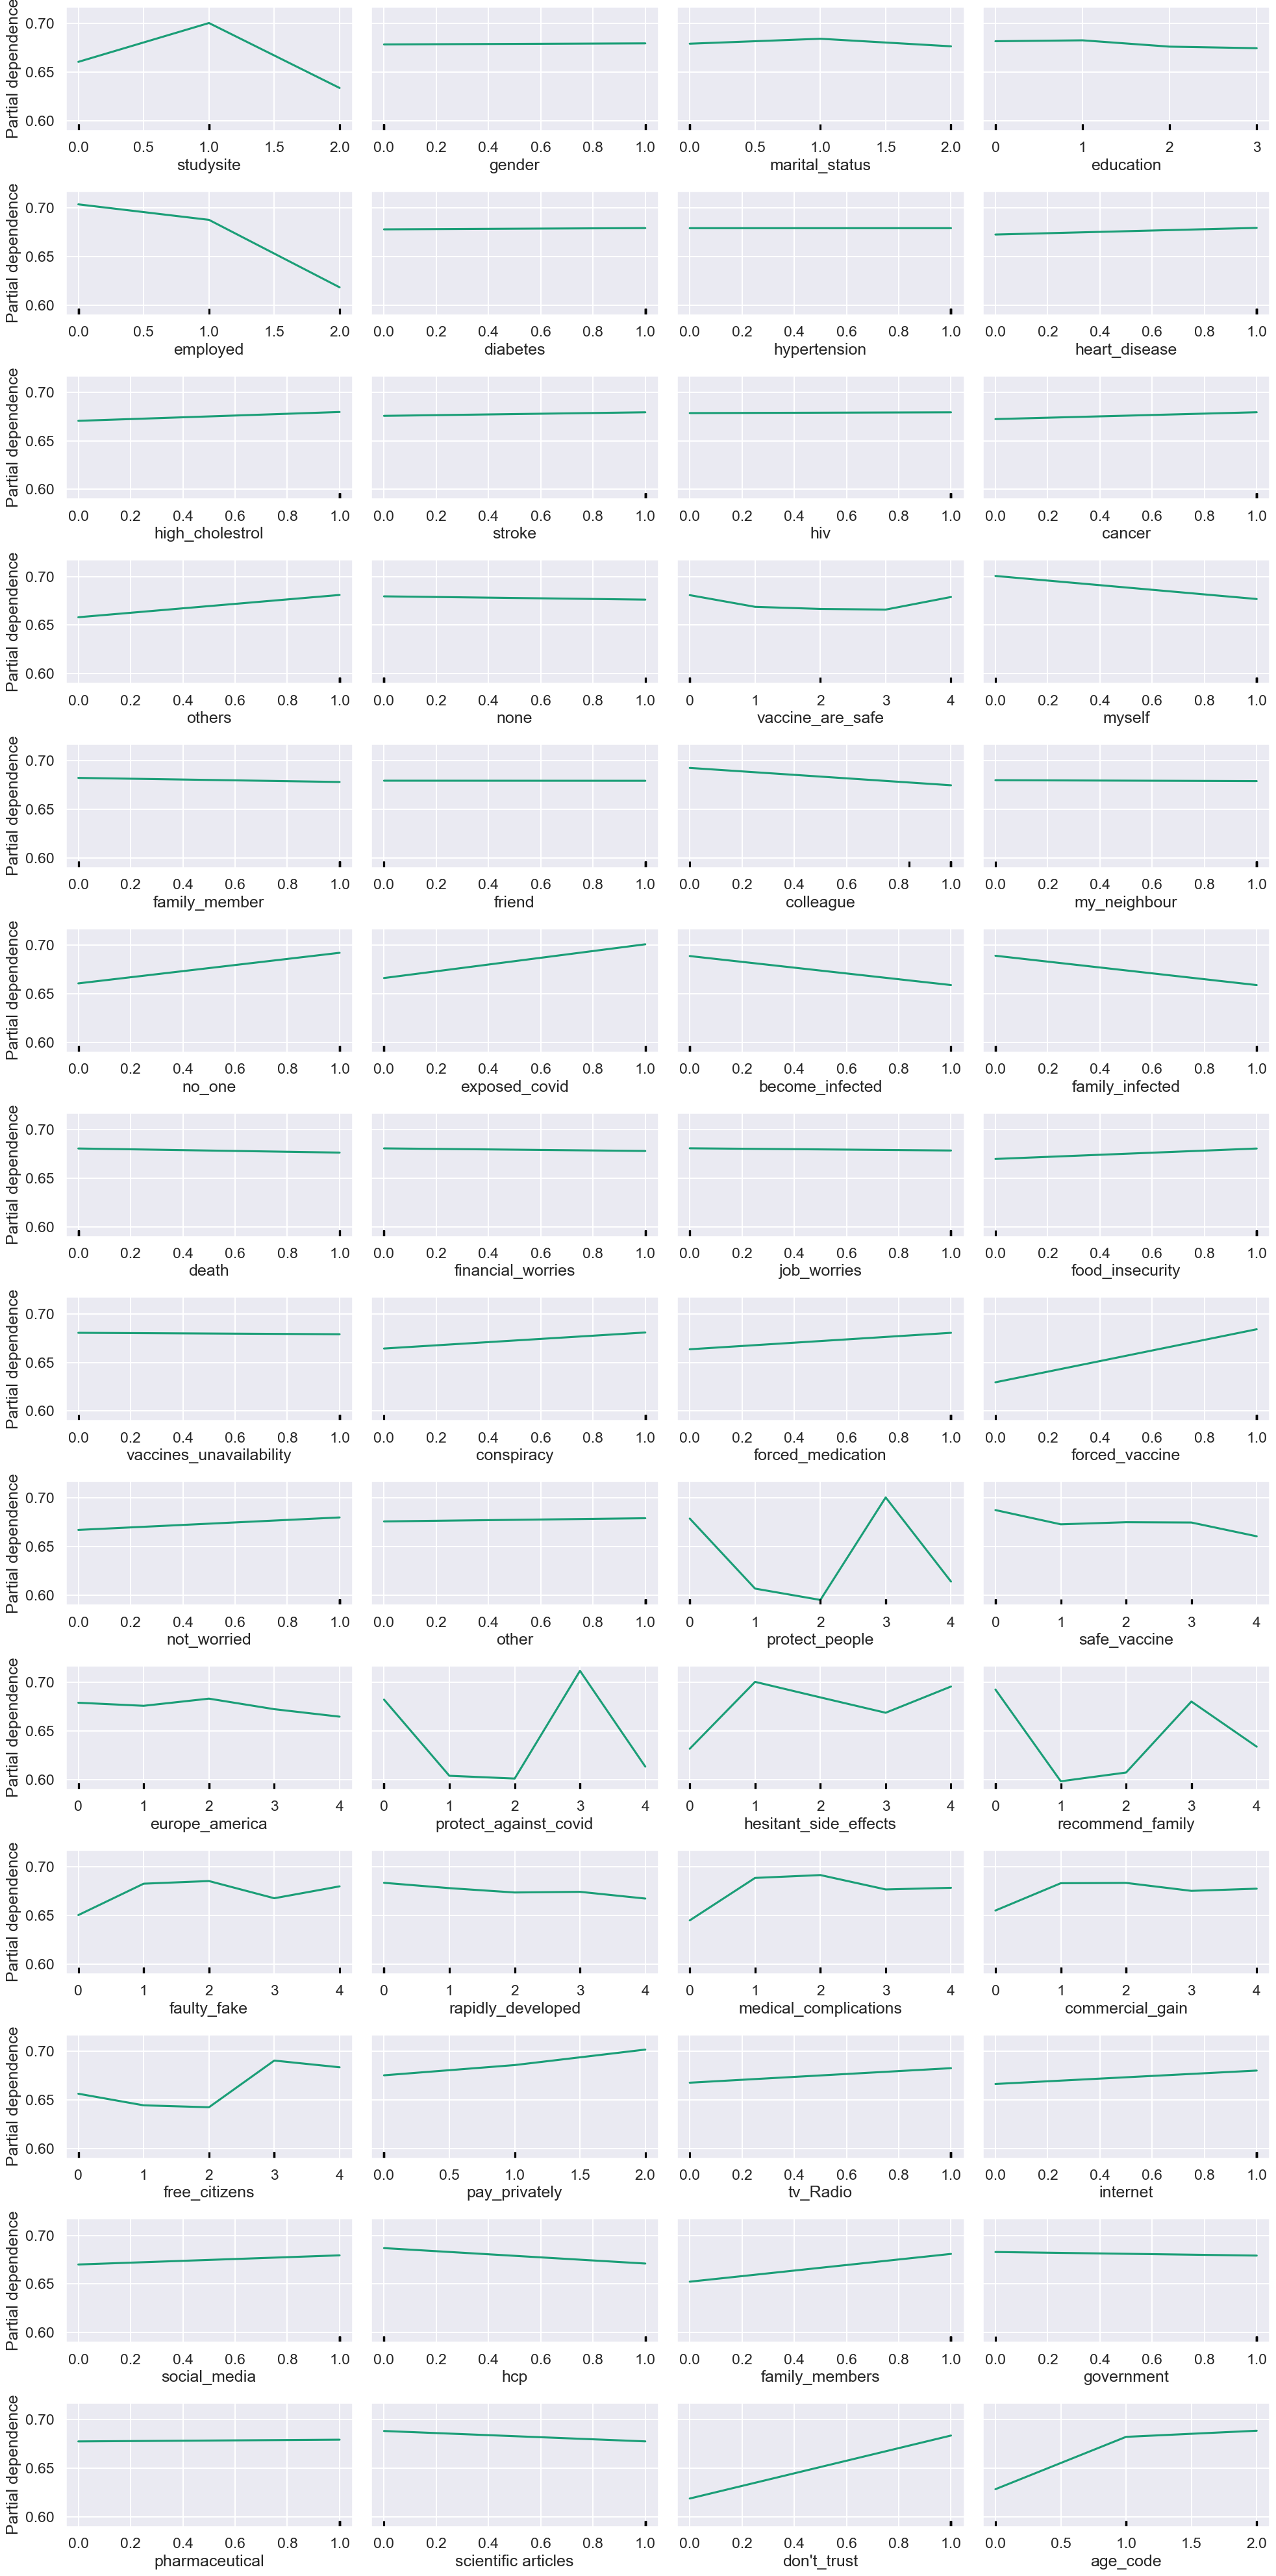

In [61]:
# plotting for all values
n_cols = 4
n_rows = int(len(X_train.columns)/n_cols)

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 40))

PartialDependenceDisplay.from_estimator(RF_clf, X_train, X_train.columns, ax=ax, n_cols=n_cols)

fig.tight_layout();

# Permutation Importance (cont')
This method is model agnostic and can be used for evaluating the importance of features for both regression and classification models.

In [42]:
## Permutation Importance
from sklearn.inspection import permutation_importance

svm_importance = permutation_importance(svm_clf, X_test, y_test, n_repeats=30, n_jobs=-1)

In [43]:
svm_importances_mean = svm_importance.importances_mean

In [44]:
feature_names = X.columns
for i, imp in enumerate(svm_importances_mean):
    print(f"Feature {feature_names[i]}: Importance {imp:.3f}")

Feature studysite: Importance 0.001
Feature gender: Importance 0.001
Feature marital_status: Importance -0.002
Feature education: Importance 0.000
Feature employed: Importance 0.004
Feature diabetes: Importance -0.001
Feature hypertension: Importance 0.000
Feature heart_disease: Importance -0.000
Feature high_cholestrol: Importance -0.000
Feature stroke: Importance -0.000
Feature hiv: Importance 0.001
Feature cancer: Importance -0.000
Feature others: Importance 0.000
Feature none: Importance 0.003
Feature vaccine_are_safe: Importance 0.001
Feature myself: Importance 0.003
Feature family_member: Importance -0.001
Feature friend: Importance 0.003
Feature colleague: Importance -0.000
Feature my_neighbour: Importance -0.001
Feature no_one: Importance 0.002
Feature exposed_covid: Importance 0.007
Feature become_infected: Importance -0.000
Feature family_infected: Importance 0.000
Feature death: Importance -0.002
Feature financial_worries: Importance -0.001
Feature job_worries: Importance 0.

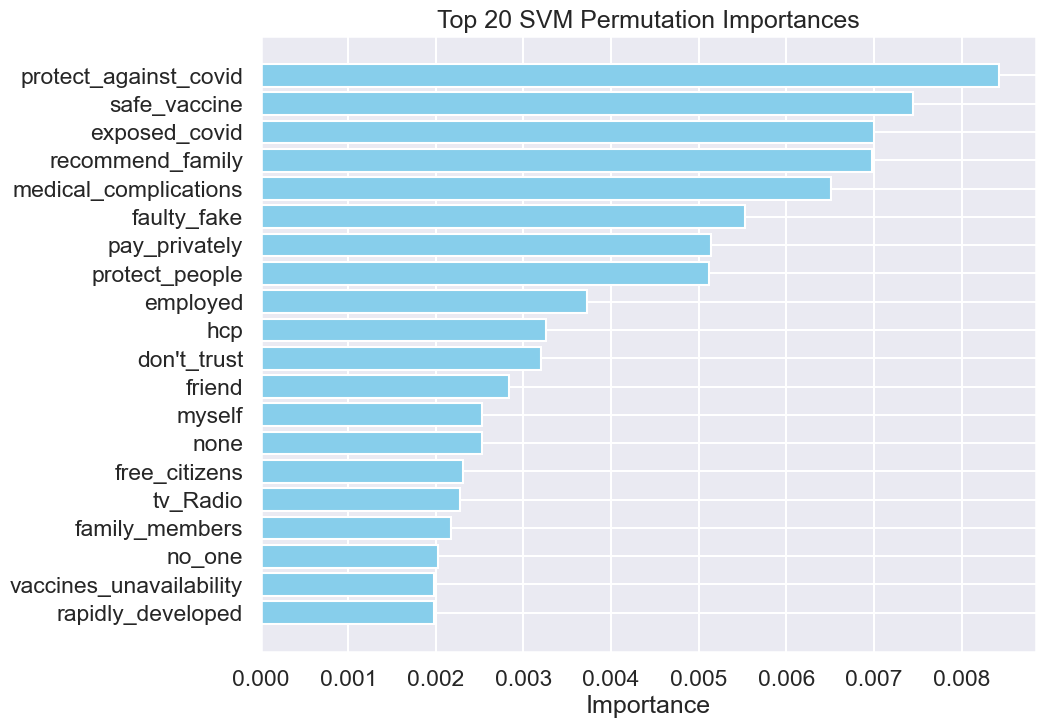

In [45]:
# Combine the importances and names into a list of tuples and sort them by importance
importances_with_names = sorted(zip(svm_importances_mean, feature_names), key=lambda x: x[0])

# Select the top 20 features (or all features if there are fewer than 20)
top_20_features = importances_with_names[-20:]

# Separate the importances and names into two lists
top_20_importances, top_20_names = zip(*top_20_features)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(range(20), top_20_importances, align='center', color='skyblue')
plt.yticks(range(20), top_20_names)
plt.xlabel('Importance')
plt.title('Top 20 SVM Permutation Importances')
plt.show()

In [46]:
# Permutation Impportance for XGboost

xgb_importance = permutation_importance(xgb_clf, X_test, y_test, n_repeats=30, n_jobs=-1)
xgb_importances_mean = xgb_importance.importances_mean

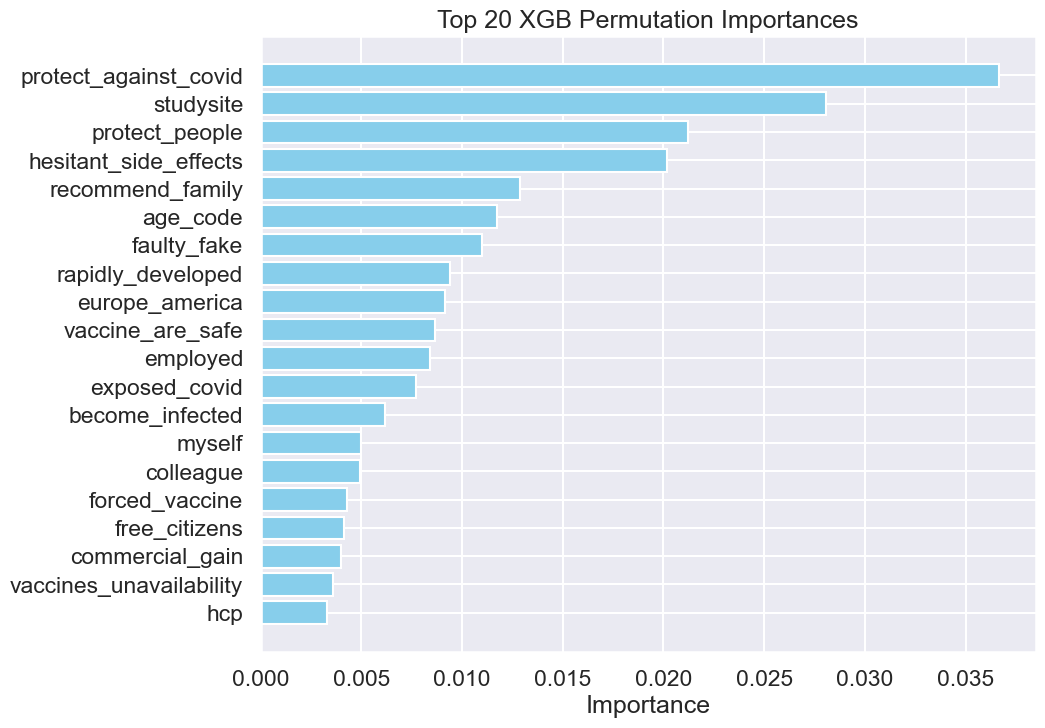

In [47]:
xgb_feature_names = X.columns

# Combine the importances and names into a list of tuples and sort them by importance
xgb_importances_with_names = sorted(zip(xgb_importances_mean, xgb_feature_names), key=lambda x: x[0])

# Select the top 20 features (or all features if there are fewer than 20)
xgb_top_20_features = xgb_importances_with_names[-20:]

# Separate the importances and names into two lists
xgb_top_20_importances, xgb_top_20_names = zip(*xgb_top_20_features)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(range(20), xgb_top_20_importances, align='center', color='skyblue')
plt.yticks(range(20), xgb_top_20_names)
plt.xlabel('Importance')
plt.title('Top 20 XGB Permutation Importances')
plt.show()

# PDPs for Multiple Models

In [62]:
# compare PDPs for highly ranking Permutation Feature Importance
# RE-run for each variable
var_2 = 'recommend_family'
var_3 = 'protect_people'
var_4 = 'studysite'
var_5 = 'exposed_covid'


# protect against covid
protect_against_covid_df = pd.DataFrame(columns=values)

protect_against_covid_df.loc['model'] = partial_dependence(RF_clf, X_train, var, kind='average')['average'][0]
protect_against_covid_df.loc['svm_clf'] = partial_dependence(svm_clf, X_train, var, kind='average')['average'][0]
protect_against_covid_df.loc['xgb_clf'] = partial_dependence(xgb_clf, X_train, var, kind='average')['average'][0]


In [63]:

values_2 = X_train[var_2].sort_values().unique()
values_3 = X_train[var_3].sort_values().unique()
values_4 = X_train[var_4].sort_values().unique()
values_5 = X_train[var_5].sort_values().unique()


In [64]:
# visualize table
protect_against_covid_df

0         1         2         3         4
model    0.682327  0.604005  0.601168  0.711946  0.613433
svm_clf  0.687544  0.640329  0.629679  0.656259  0.710851
xgb_clf  0.698334  0.587614  0.600986  0.732210  0.616070

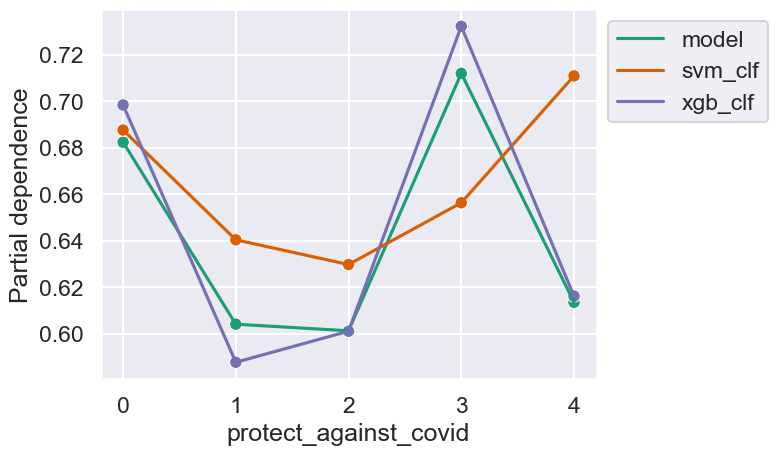

In [65]:
pa_covid = protect_against_covid_df.reset_index().melt('index')

sns.lineplot(data=pa_covid, x='variable', y='value', hue='index');
sns.scatterplot(data=pa_covid, x='variable', y='value', hue='index', legend=False)

plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel("Partial dependence")
plt.xlabel(var);

- Feature importance is often specific to certain models. It measures the increase in the model's prediction error when the feature's information is altered (or removed). The exact calculation of feature importance can vary depending on the model type.  
- Permutation importance is model agnostic, meaning it can be used with any model. It assesses the importance of a feature by calculating the increase in the model's prediction error after permuting the feature, thus breaking the relationship between the feature and the outcome. It doesn't rely on the model internals.

# let's compare all variables across the 3 models


c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_bun

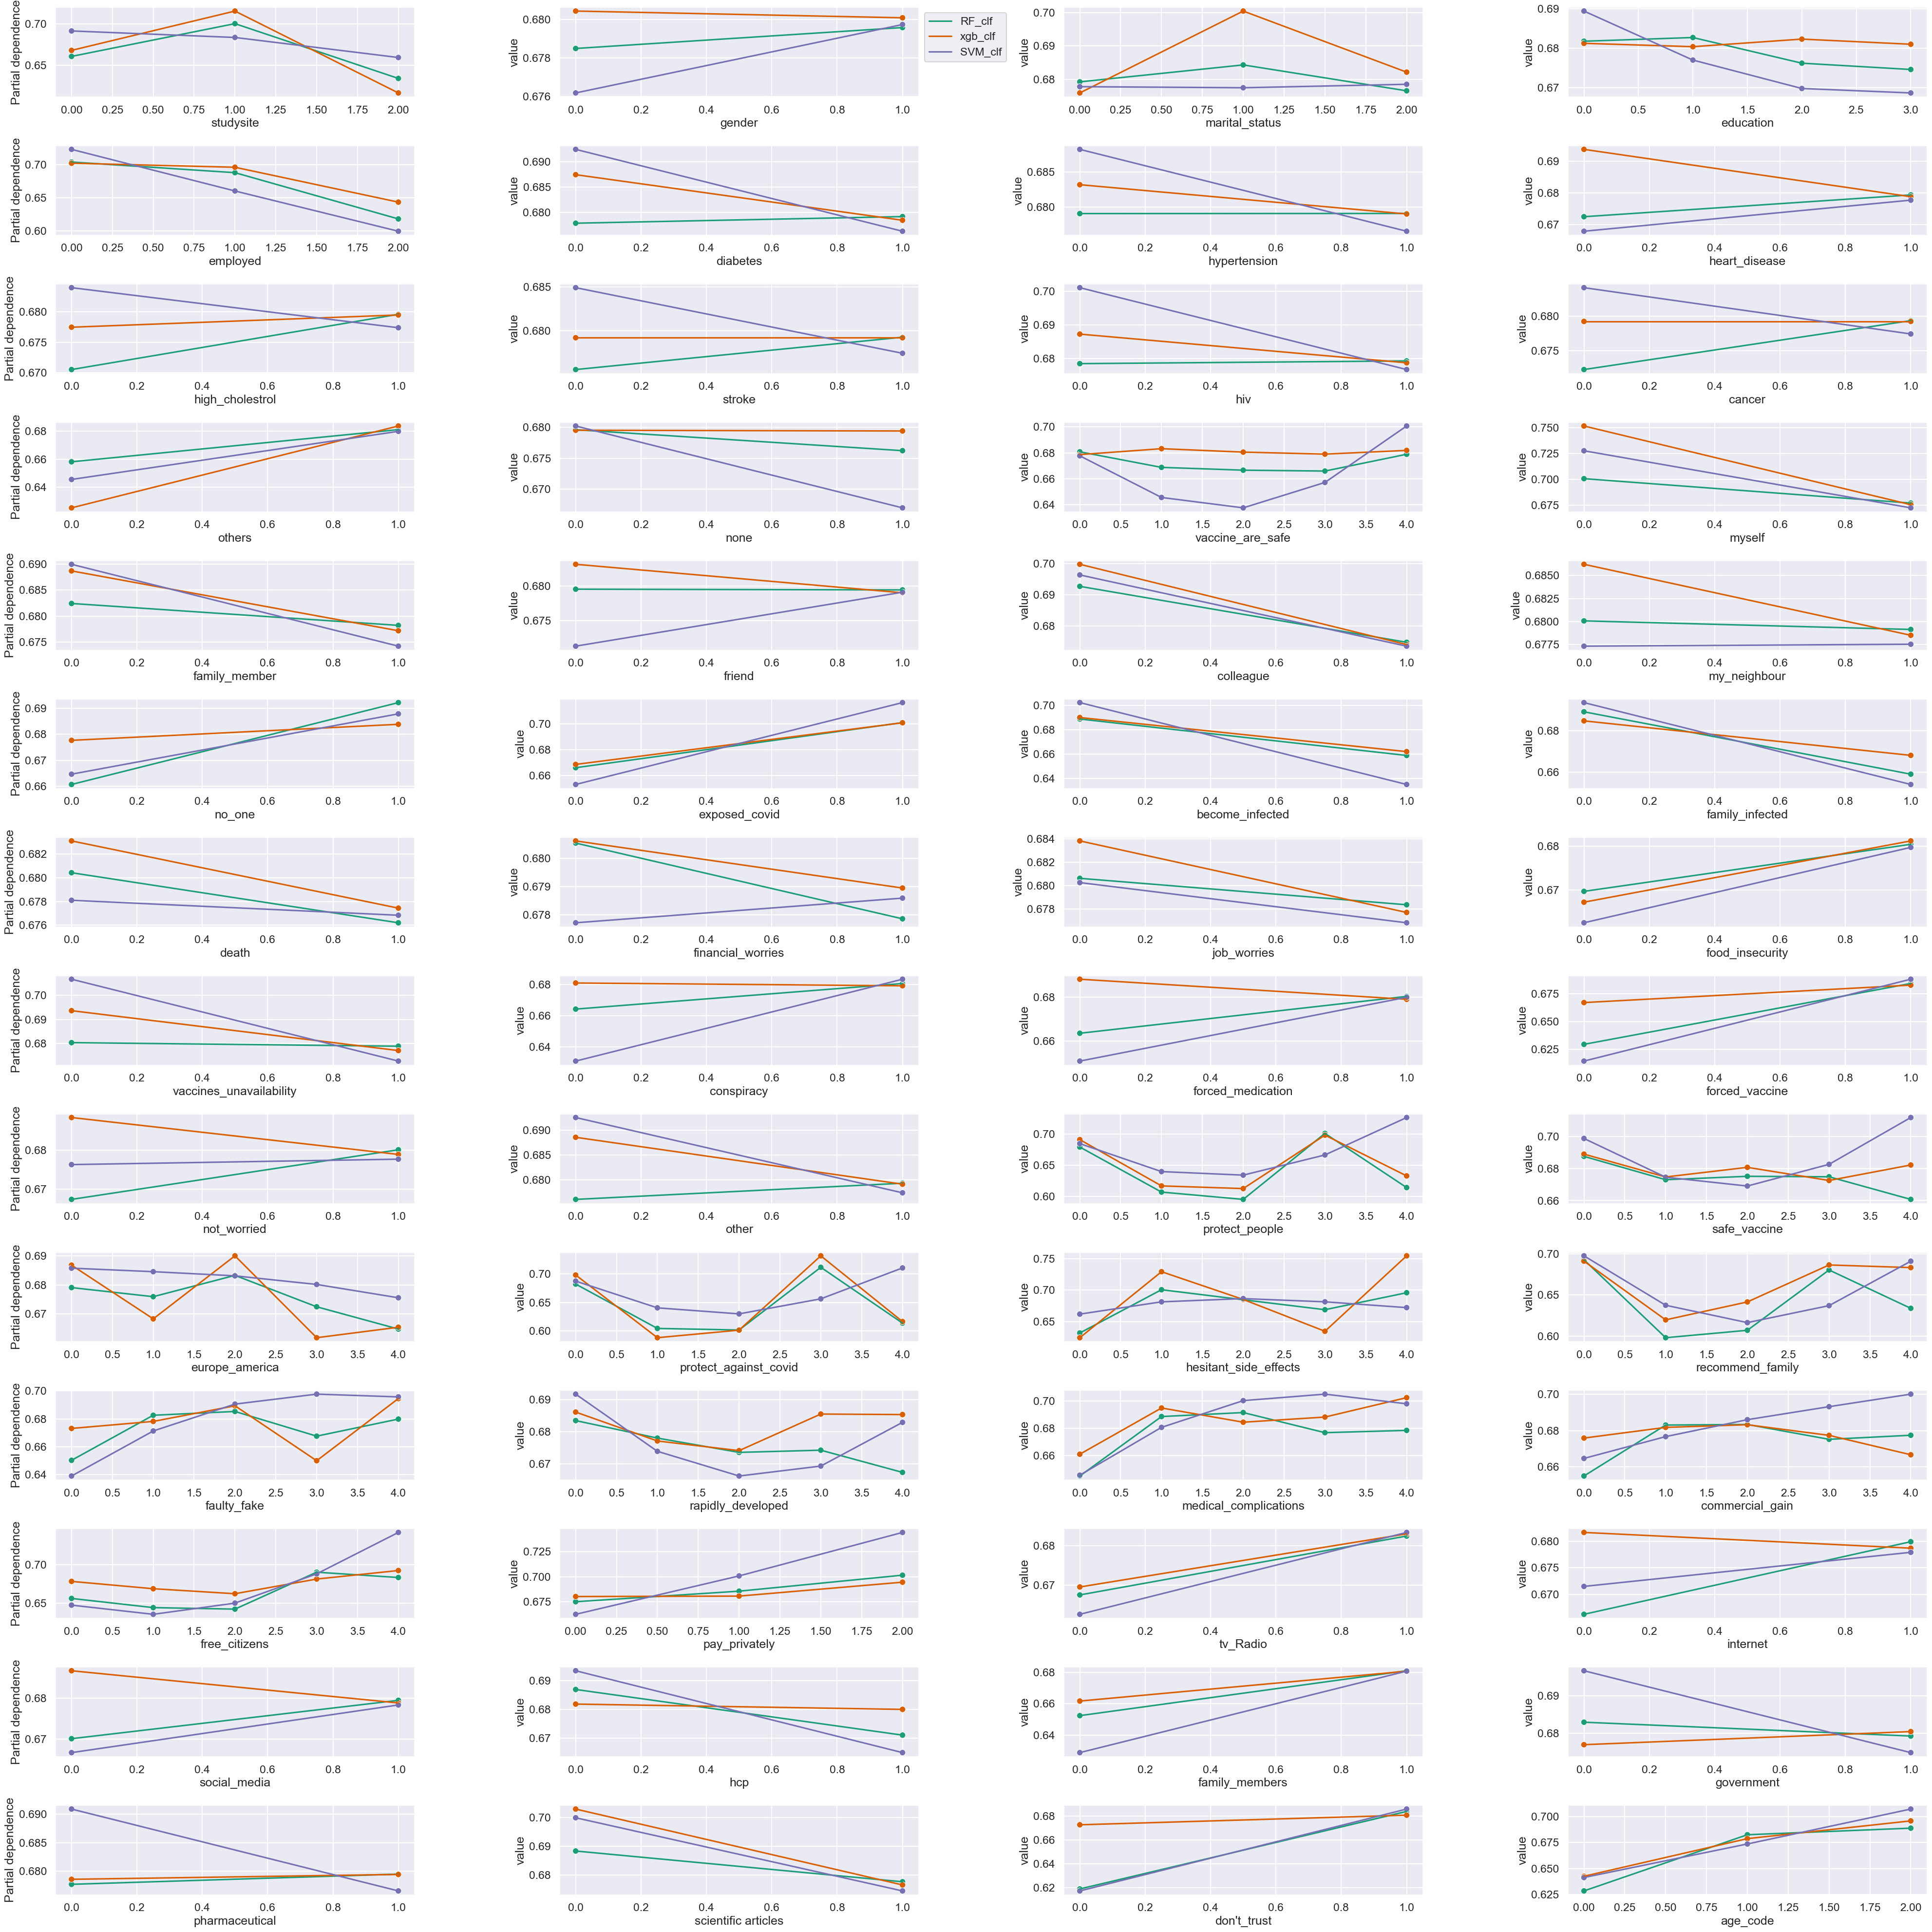

In [67]:
summary = {}  # create an empty dictionary
fig, ax = plt.subplots(n_rows, n_cols, figsize=(40,40))


for i, x in enumerate(X_train.columns):
    
    summary[x] = pd.DataFrame(columns=values)

    raw_values = partial_dependence(RF_clf, X_train, x, kind='average')
    
    summary[x] = pd.DataFrame(columns=raw_values['values'][0])

    summary[x].loc['RF_clf'] = raw_values['average'][0]

    summary[x].loc['xgb_clf'] = partial_dependence(xgb_clf, X_train, x, kind='average')['average'][0]

    summary[x].loc['SVM_clf'] = partial_dependence(svm_clf, X_train, x, kind='average')['average'][0]
    
    data = summary[x].reset_index().melt('index')

    loc = i//n_cols, i%n_cols
    
    if i==1:
        sns.lineplot(data=data, x='variable', y='value', 
                     hue='index',ax=ax[loc]);
        ax[loc].legend(bbox_to_anchor=(1, 1));
    else: 
        sns.lineplot(data=data, x='variable', y='value', 
                     hue='index', ax=ax[loc], legend=False);
    sns.scatterplot(data=data, x='variable', y='value', 
                    hue='index', ax=ax[loc], legend=False)
    ax[loc].set_xlabel(x)
    if i%n_cols==0:
        ax[loc].set_ylabel('Partial dependence')


fig.tight_layout()


In [215]:
# Stacking

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# Define the base learners
base_learners = [
    ('dt', DecisionTreeClassifier(max_depth=3, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# Define the meta-learner
meta_learner = svm.SVC()

# Build the stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Stacking Model Accuracy: {accuracy:.2f}')


Stacking Model Accuracy: 0.79


- Feature importance is often specific to certain models. It measures the increase in the model's prediction error when the feature's information is altered (or removed). The exact calculation of feature importance can vary depending on the model type.  
- Permutation importance is model agnostic, meaning it can be used with any model. It assesses the importance of a feature by calculating the increase in the model's prediction error after permuting the feature, thus breaking the relationship between the feature and the outcome. It doesn't rely on the model internals.